## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [280]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegressionCV, Ridge, LogisticRegression, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Wine Random Forest

In [5]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['Target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [104]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=1)

In [107]:
#default to check
RF_clf = RandomForestClassifier(n_estimators=300, random_state=1)
RF_clf_result = cross_val_score(RF_clf, x_train, y_train, scoring='accuracy', cv=5)
print('RF_clf_result:{:.3} +/- {:.3} with 95% CI\n{}'.format(np.mean(RF_clf_result), np.std(RF_clf_result)*2, RF_clf_result))
RF_clf.fit(x_train, y_train)
y_pred_RF_clf = RF_clf.predict(x_test)
print('RF_clf_test_score:{:.3}/{:.3}'.format(RF_clf.score(x_test, y_test), np.mean(y_pred_RF_clf == y_test)))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_RF_clf), columns=wine.target_names, index=wine.target_names)

RF_clf_result:0.976 +/- 0.0395 with 95% CI
[0.96296296 1.         0.95833333 0.95833333 1.        ]
RF_clf_test_score:0.981/0.981


,class_0,class_1,class_2
class_0,23,0,0
class_1,1,18,0
class_2,0,0,12


In [108]:
#GridSearch
param_grid = {'n_estimators':list(range(100, 1001, 100)),
              'max_features':list(range(2, 10))+ ['auto']}
RF_cv_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy',
                         iid=False, cv =5, return_train_score=True)
RF_cv_clf.fit(x_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [109]:
RF_cv_result = pd.DataFrame(RF_cv_clf.cv_results_)
sorted(RF_cv_clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_max_features',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [192]:
interest_col = ['mean_test_score',
                  'std_test_score',
                  'mean_train_score',
                  'std_train_score',
                  'param_max_features',
                  'param_n_estimators']
RF_cv_result[interest_col].head()

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_max_features,param_n_estimators
0,0.984259,0.019334,1.0,0.0,2,100
1,1.000000,0.000000,1.0,0.0,2,200
2,0.991667,0.016667,1.0,0.0,2,300
3,0.991667,0.016667,1.0,0.0,2,400
4,0.991667,0.016667,1.0,0.0,2,500


In [111]:
RF_cv_clf.best_score_, RF_cv_clf.best_index_, RF_cv_clf.best_params_, RF_cv_clf.best_estimator_

(1.0,
 1,
 {'max_features': 2, 'n_estimators': 200},
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features=2, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

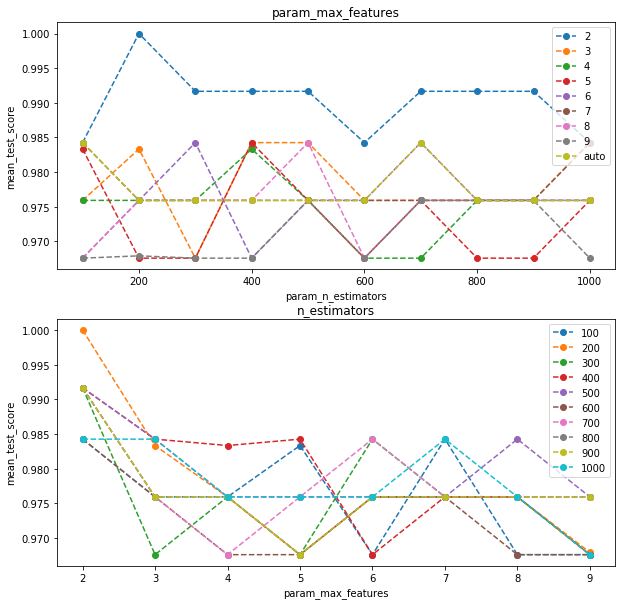

In [209]:
RF_cv_result.loc[RF_cv_result['param_max_features'] == 2, interest_col ]
plt.figure(figsize=(10, 10))
idx_list= []
idx_1_list = []
plt.subplot(211)
for idx in (list(range(2, 10)) + ['auto']):
    plt.plot(RF_cv_result.loc[RF_cv_result['param_max_features'] == idx, ['param_n_estimators']],
                RF_cv_result.loc[RF_cv_result['param_max_features'] == idx, ['mean_test_score']], '--o')
    plt.xlabel('param_n_estimators')
    plt.ylabel('mean_test_score')
    plt.title('param_max_features')
    idx_list.append(idx)
    plt.legend(idx_list)
plt.subplot(212)
for idx_1 in range(100, 1001, 100):
    plt.plot(RF_cv_result.loc[((RF_cv_result['param_n_estimators'] == idx_1).values & (RF_cv_result['param_max_features'] != 'auto').values),
                              ['param_max_features']],
             RF_cv_result.loc[((RF_cv_result['param_n_estimators'] == idx_1).values & (RF_cv_result['param_max_features'] != 'auto').values), 
                              ['mean_test_score']], '--o')
    plt.xlabel('param_max_features')
    plt.ylabel('mean_test_score')
    plt.title('n_estimators')
    idx_1_list.append(idx_1)
    plt.legend(idx_1_list)
plt.show()

In [129]:
RF_test_confusion = pd.DataFrame(metrics.confusion_matrix(y_test, RF_cv_clf.best_estimator_.predict(x_test)))
print('RF_test_accuracy:', metrics.accuracy_score(y_test, RF_cv_clf.best_estimator_.predict(x_test)))
print('RF_test_precesion:', metrics.precision_score(y_test, RF_cv_clf.best_estimator_.predict(x_test), average='macro'))
print('RF_test_recall:', metrics.recall_score(y_test, RF_cv_clf.best_estimator_.predict(x_test), average='macro'))
print('RF_test_F1_score:', metrics.f1_score(y_test, RF_cv_clf.best_estimator_.predict(x_test), average='micro'))
RF_test_confusion

RF_test_accuracy: 0.9814814814814815
RF_test_precesion: 0.9861111111111112
RF_test_recall: 0.9824561403508771
RF_test_F1_score: 0.9814814814814815


,0,1,2
0,23,0,0
1,1,18,0
2,0,0,12


# Wine LR

In [254]:
#logistic
ss_scaler = StandardScaler()
ss_scaler.fit(x_train)
x_train_ss = ss_scaler.transform(x_train)
x_test_ss = ss_scaler.transform(x_test)
LR_reg = LogisticRegression()
LR_reg_cv_result = cross_val_score(LR_reg, x_train_ss, y_train, cv=5)
print(np.mean(LR_reg_cv_result), LR_reg_cv_result)
LR_reg.fit(x_train_ss, y_train)
print('test_accuracy:', np.mean(LR_reg.predict(x_test_ss) == y_test))

0.9842592592592592 [0.96296296 1.         0.95833333 1.         1.        ]
test_accuracy: 1.0


In [261]:
#LogisticRegressionCV
LR_cv_reg = LogisticRegressionCV(Cs=[10**i for i in range(-10, 10)], cv=5)
LR_cv_reg.fit(x_train_ss, y_train)
print('test_accuracy:', np.mean(LR_cv_reg.predict(x_test_ss) == y_test))
print(LR_cv_reg.C_)
print(LR_cv_reg.coef_)
pd.DataFrame(metrics.confusion_matrix(y_test, LR_cv_reg.predict(x_test_ss)), columns=wine.target_names, index=wine.target_names)

test_accuracy: 1.0
[10.   1.   0.1]
[[ 2.0608169   1.14141727  1.61965607 -2.10839652  0.23961349  0.19627168
   1.51406536 -0.40628881 -0.54779374 -0.27128525  0.27727541  1.843031
   3.05179295]
 [-1.29191499 -0.69798857 -1.13179039  0.62946802 -0.00749626  0.13060576
   0.53457466  0.29512369  0.22305682 -1.822544    0.7840905  -0.0149989
  -1.83146012]
 [ 0.18098733  0.33097281  0.1947941   0.23106543  0.07636579 -0.34512287
  -0.6023421   0.15303033 -0.28946711  0.58685069 -0.57101003 -0.54421432
  -0.01250947]]


,class_0,class_1,class_2
class_0,23,0,0
class_1,0,19,0
class_2,0,0,12


# Boston

In [180]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Target'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=0)

In [190]:
#default check
RF_reg = RandomForestRegressor(n_estimators=300,)
RF_reg_cv_result = cross_val_score(RF_reg, X_train, Y_train, cv=5)
print('RF_ref_cv_ressult:{:.3} +/- {:.3} with 95% CI\n{}'.format(np.mean(RF_reg_cv_result), 
                                                                 np.std(RF_reg_cv_result)*2, RF_reg_cv_result))
RF_reg.fit(X_train, Y_train)
y_pred_RF_reg = RF_reg.predict(X_test)
print('RF_reg_test_result:{}'.format(metrics.r2_score(Y_test, y_pred_RF_reg)))

RF_ref_cv_ressult:0.84 +/- 0.124 with 95% CI
[0.92242497 0.7375949  0.83358006 0.82660619 0.88169103]
RF_reg_test_result:0.8271824313485877


In [235]:
RF_reg_cv_result

array([0.92242497, 0.7375949 , 0.83358006, 0.82660619, 0.88169103])

In [236]:
(RF_reg_cv_result - np.mean(RF_reg_cv_result)) /np.std(RF_reg_cv_result)

array([ 1.32267147, -1.65700859, -0.10961389, -0.22204097,  0.66599198])

In [221]:
print(RF_reg.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>


In [195]:
RF_reg.score(X_train, Y_train)

0.9835895685806751

In [196]:
#GridSeachCV
param_grid = {'n_estimators':list(range(100, 1001, 100)), 'max_features': list(range(1, 13))+['auto']}
RF_cv_reg = GridSearchCV(RandomForestRegressor(), param_grid, scoring='r2', cv=5, return_train_score=True, iid=False)
RF_cv_reg.fit(X_train, Y_train)
#RF_cv_reg.cv

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [202]:
RF_cv_reg.best_index_, RF_cv_reg.best_score_, RF_cv_reg.best_params_

(45, 0.8780102658182611, {'max_features': 5, 'n_estimators': 600})

In [215]:
RF_cv_result_reg = pd.DataFrame(RF_cv_reg.cv_results_)
RF_cv_result_reg.iloc[45]

mean_fit_time                                          1.13595
mean_score_time                                      0.0511714
mean_test_score                                        0.87801
mean_train_score                                      0.984841
param_max_features                                           5
param_n_estimators                                         600
params                {'max_features': 5, 'n_estimators': 600}
rank_test_score                                              1
split0_test_score                                     0.925208
split0_train_score                                    0.985166
split1_test_score                                     0.827778
split1_train_score                                    0.986656
split2_test_score                                     0.887131
split2_train_score                                    0.984803
split3_test_score                                     0.857472
split3_train_score                                    0

In [199]:
sorted(RF_cv_reg.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_max_features',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [201]:
key_col = ['mean_test_score', 'std_test_score',
           'mean_train_score', 'std_train_score', 
           'param_max_features', 'param_n_estimators']
boston_cv_result = RF_cv_result_reg[key_col]

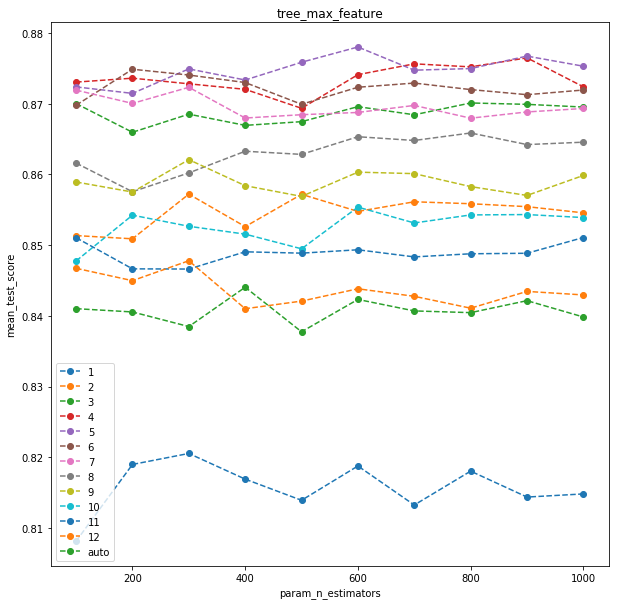

In [210]:
# visulization 
plt.figure(figsize=(10, 10))
idx_list = []
for idx in (list(range(1, 13)) + ['auto']):
    plt.plot(boston_cv_result.loc[boston_cv_result['param_max_features'] == idx, ['param_n_estimators']],
             boston_cv_result.loc[boston_cv_result['param_max_features'] == idx, ['mean_test_score']], '--o')
    plt.xlabel('param_n_estimators')
    plt.ylabel('mean_test_score')
    plt.title('tree_max_feature')
    idx_list.append(idx)
    plt.legend(idx_list)
plt.show()

In [217]:
y_pred_RF_cv_reg =  RF_cv_reg.best_estimator_.predict(X_test)
print(RF_cv_reg.best_params_)
print('RF_reg_test_result:{}'.format(metrics.r2_score(Y_test, y_pred_RF_cv_reg)))

{'max_features': 5, 'n_estimators': 600}
RF_reg_test_result:0.7727714908182111


In [222]:
RF_cv_reg.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)>

In [225]:
check_reg = RandomForestRegressor(n_estimators=100, max_features='auto')
check_reg.fit(X_train, Y_train)
print(check_reg.score(X_test, Y_test))

0.8304041724489224


# Boston Ridge

In [269]:
X_train.shape, X_train_ss.shape, Y_train.shape

((354, 13), (354, 13), (354,))

In [282]:
ss_scaler.fit(X_train)
X_train_ss = ss_scaler.transform(X_train)
X_test_ss = ss_scaler.transform(X_test)
ridge_reg = Ridge()
ridge_result = cross_val_score(ridge_reg, X_train_ss, Y_train.reshape(-1, 1), scoring='r2', cv=5)
print('{} +/- {} 95% CI:\n{}'.format(np.mean(ridge_result), np.std(ridge_result)*2, ridge_result))
ridge_reg.fit(X_train_ss, Y_train)
print('ridge_test_score:', metrics.r2_score(Y_test, ridge_reg.predict(X_test_ss)))


0.7192209481216887 +/- 0.14742501514453518 95% CI:
[0.7271232  0.58203168 0.77518087 0.72078191 0.79098708]
ridge_test_score: 0.6727737684528233


In [279]:
ridge_cv_reg = RidgeCV(alphas=[10**i for i in range(-10, 10)], cv=5)
ridge_cv_reg.fit(X_train_ss, Y_train)
print('Ridge_coef:', ridge_cv_reg.coef_)
print('Ridge_alpha:', ridge_cv_reg.alpha_)
print('test_r2_score:', metrics.r2_score(Y_test, ridge_cv_reg.predict(X_test_ss))) 

Ridge_coef: [-0.93339802  0.90177932 -0.1300991   0.65314123 -1.55467533  2.78015332
 -0.31814058 -2.75181154  1.47084556 -1.32721467 -2.18367326  0.58660906
 -3.29741238]
Ridge_alpha: 10.0
test_r2_score: 0.6674648670481825


# Boston Lasso

In [283]:
#Lasso
lasso_reg = Lasso()
lasso_result = cross_val_score(lasso_reg, X_train_ss, Y_train, cv=5, scoring='r2')
print('{} +/- {} 95% CI:\n{}'.format(np.mean(lasso_result), np.std(lasso_result)*2, lasso_result))
lasso_reg.fit(X_train_ss, Y_train)
print('lasso_test_score:', metrics.r2_score(Y_test, lasso_reg.predict(X_test_ss)))

0.6774284745995518 +/- 0.11179357805537779 95% CI:
[0.70827443 0.59111518 0.7261169  0.63168923 0.72994663]
lasso_test_score: 0.5999442961470398


In [284]:
#Lasso CV
lasso_cv_reg = LassoCV(alphas=[10**i for i in range(-10, 10)], cv=5)
lasso_cv_reg.fit(X_train_ss, Y_train)
print('Lasso_coef:', lasso_cv_reg.coef_)
print('Lasso_alpha:', lasso_cv_reg.alpha_)
print('test_r2_score:', metrics.r2_score(Y_test, lasso_cv_reg.predict(X_test_ss))) 

Lasso_coef: [-0.98378624  1.01194239  0.          0.62075358 -1.81305115  2.7143873
 -0.26357128 -3.03814963  1.92347918 -1.7183718  -2.24390248  0.57036891
 -3.441437  ]
Lasso_alpha: 0.01
test_r2_score: 0.6724327650469639
